<h3>USFWS EDA Plot Group 5 Multi-survey percent gravel and fines control vs treatment box plots</3>

This notebook, and the plots that extend from it, presents the distribution of coarse (gravels, phi = -1) and finer grain (phi >= 2.5) sands in the Pea Island surveyed beach data. 

Processing is grouped across all surveys such that the final plots show a series of boxplot pairs (control vs treatment) for each beach survey. **The key to making the magic happen in this notebook is the file: USFWS_Survey_Plotting_Data.csv. You need this file as input for generating the Group 5 plots!** Here, you'll find all of the survey data from the July, 2014 initial to the most recent (entered), computed as fractional weight percentages. Update the USFWS_Survey_Plotting_Data.csv file as new surveys are accumulated...

The notebook 


**Supports:**

transects=['C11','C10','C9','C8','C7','C6','C5','C4','C3','C2','C1','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10',
'T11','T12','T13','T14','T15','T16']

surveys=[201407, 201409, 201504, 201508, 201602, 201605, 201608 ]

phis=['phi-1','phi-0.5','phi_0','phi_0.5','phi_1','phi_1.25','phi_1.5','phi_1.75','phi_2','phi_2.5','phi_3','phi_3.5','phi_4','remainder']

whole phis=['phi_-1','phi_0','phi_1','phi_2','phi_3','remainder']

samples=['S1','S2','S3','S5','S4']
<br /><br />

--Notebook circa: 10/2016
Author: Paul P
<br />
--keywords: Python, pandas, matplotlib, box plot, median, sand sediment grain size analysis, Pea Island, North Carolina

<h4>Load the requisite modules and libraries</h4>

In [29]:
# import requiste Python libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h4>User Inputs: These are required!!!</h4>

In [27]:
####################################################################################

sample='S1'

####################################################################################

<h4>Fixed inputs:</h4>

In [30]:
datapath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/data/' # where your data is stored...
fn='USFWS_Survey_Plotting_Data.csv'     # NOTE this file contains all surveys from 7/2014 thru 8/2016, inclusive

plotpath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/plotGroup5/' # where your plots end up...

<h4>Load data from source into a pandas dataframe</h4>

In [37]:
# use the following lines to read from source: 'USFWS_Survey_Plotting_Data.csv'  
hdr=['group','transect','sample','survey','phi_-1','phi_-0.5','phi_0','phi_0.5','phi_1','phi_1.25','phi_1.5','phi_1.75','phi_2','phi_2.5','phi_3','phi_3.5','phi_4','remainder']
df=pd.read_csv(datapath+fn, names=hdr ).fillna(0) 

<h4>Data Preprocessing II: (Aggregating individual screens into gravel and fine fractions)</h4>

In [38]:
# compute the sample percentage that is in the gravel and fines fractions:
# 1., sum all the individual bin (phi) weights:
df['total_wt']=df['phi_-1']+df['phi_-0.5']+df['phi_0']+df['phi_0.5']+df['phi_1']+df['phi_1.25'] \
+df['phi_1.5']+df['phi_1.75']+df['phi_2']+df['phi_2.5']+df['phi_3']+df['phi_3.5'] \
+df['phi_4']+df['remainder']

# 2., using the phi_-1 field as the 'gravel' weight fraction:
df['pgravel']=df['phi_-1']    #/df['total_wt'])*100.0

               
# 3., combine phi 2.5, 3.0, 3.5, 4.0, and pan (remainder) to create a fines field:
df['pfines']=df['phi_2.5']+df['phi_3']+df['phi_3.5']+df['remainder']   #/df['total_wt'])*100.0

# replace the NaN values in the new fields with 0s:
df=df.fillna(0)

# drop the now unnecessary fields: phi_-1, phi_-0.5, phi_0, phi_0.5, phi_1, phi_1.25, phi_1.5, phi_1.75, phi_2
# phi_2.5, phi_3, phi_3.5, phi_4, and remainder:
df=df.drop(['phi_-1','phi_-0.5','phi_0','phi_0.5','phi_1','phi_1.25','phi_1.5','phi_1.75','phi_2','phi_2.5'], axis=1)
df=df.drop(['phi_3','phi_3.5','remainder'], axis=1)

query_string = 'sample == '+'\"'+sample+'\"'
df1=df.query(query_string)       ####### ADJUST ####### 'saple=="S5"'
#df1=df.groupby(['survey', 'transect'], sort=False, as_index=False)[['pgravel','pfines']].sum()

df1

,group,transect,sample,survey,phi_4,total_wt,pgravel,pfines
0,control,C11,S1,201407,0.000,100.000,28.797,0.283
5,control,C10,S1,201407,0.000,100.002,96.313,0.045
10,control,C9,S1,201407,0.000,100.001,57.771,0.098
15,control,C8,S1,201407,0.000,100.000,16.871,0.334
20,control,C7,S1,201407,0.000,99.999,21.366,1.706
25,control,C6,S1,201407,0.000,100.001,15.546,3.919
30,control,C5,S1,201407,0.000,100.000,18.847,6.816
35,control,C4,S1,201407,0.000,100.001,30.419,2.298
40,control,C3,S1,201407,0.000,100.001,8.845,3.091
45,control,C2,S1,201407,0.000,100.003,5.376,3.543


<h4>Plot the Gravel Fraction</h4>

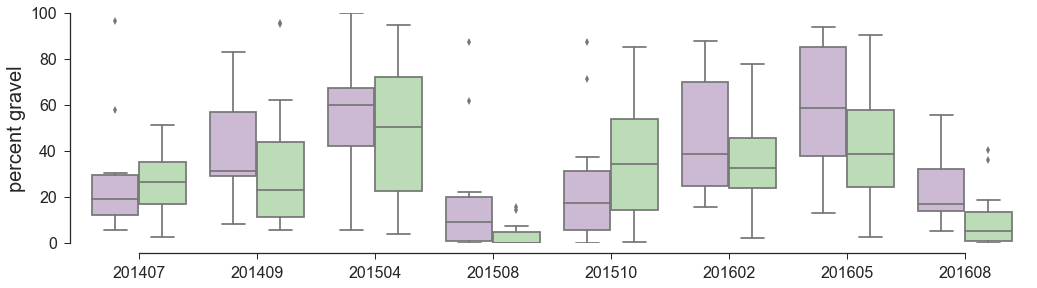

In [39]:
####### LET'S PLOT STUFF -- THE GRAVELS #######

figpg = plt.figure(figsize=(15,5))
axspg = figpg.add_subplot(1,1,1)
figpg.tight_layout(pad=5.1, w_pad=0.5, h_pad=2.0)

sns.set_context('talk')
sns.set(style="ticks")
#sns.set(rc={'axes.facecolor':'white', 'grid.color': 'white'})
# nested boxplot showing percent gravel in samples by survey, by group
axc=sns.boxplot(x='survey', y='pgravel', hue='group', data=df1, palette='PRGn' )

axc.set(ylim=(0,100))
sns.despine(offset=10, trim=True)

plt.xticks(size=16)
plt.yticks(size=16)
axc.set_xlabel('') 
plt.ylabel('percent gravel', fontsize=20)
axc.legend_.remove()

#plt.savefig(plot_path+'Sample_'+sample+'_percent_gravel.jpg', dpi=300) 

<h4>Plot the Fines Fraction</h4>

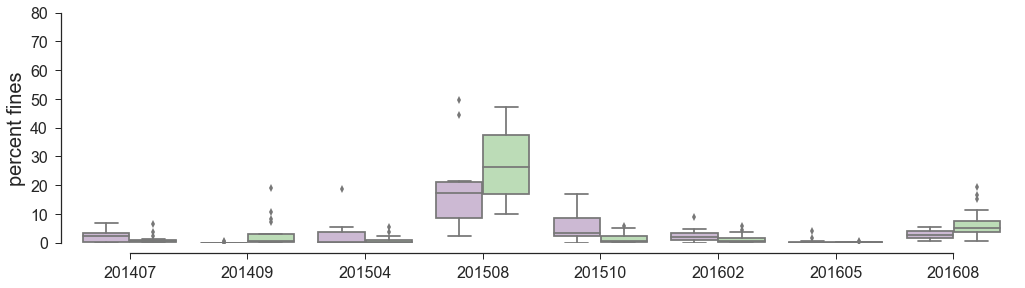

In [40]:
####### LET'S PLOT STUFF -- THE FINES #######

sns.set_context('talk')
figpf = plt.figure(figsize=(15,5))
axspf = figpf.add_subplot(1,1,1)
figpf.tight_layout(pad=3.1, w_pad=0.5, h_pad=2.0)

sns.set(style="ticks")

# nested boxplot showing percent fines in samples by survey, by group
axf=sns.boxplot(x='survey', y='pfines', hue='group', data=df1, palette='PRGn' )

axf.set(ylim=(0,80))
sns.despine(offset=10, trim=True)  # despine must come AFTER the axis limits are set!!!

plt.xticks(size=16)
plt.yticks(size=16)
axf.set_xlabel('')    #plt.xlabel('survey', fontsize=14)
plt.ylabel('percent fines', fontsize=20)
axf.legend_.remove()

#plt.savefig(plot_path+'Sample_'+sample+'_percent_fines.jpg', dpi=300)       

In [33]:
df2=df.query('survey==201602 & group=="control"')
df2
[0,10,20,30,40,50,60,70,80],['0','10','20','30','40','50','60','70','80'],

,group,transect,sample,survey,total_wt,pgravel,pfines
540,control,C11,S1,201602,99.999,20.159,2.018
541,control,C11,S2,201602,99.998,2.929,5.151
542,control,C11,S3,201602,100.000,0.000,16.653
543,control,C11,S4,201602,100.001,0.000,78.114
544,control,C11,S5,201602,99.999,0.000,47.103
545,control,C10,S1,201602,99.999,15.765,3.051
546,control,C10,S2,201602,100.000,42.101,0.863
547,control,C10,S3,201602,100.000,0.000,8.077
548,control,C10,S4,201602,99.999,0.000,43.818
549,control,C10,S5,201602,100.002,0.745,66.764


__Spare Parts and Scratch Space__

In [54]:
import os

os.system('jupyter nbconvert --to script USFWS\ EDA\ Plot\ Group\ 5\ percent\ gravel\ and\ fines\ control\ vs\ treatment\ box\ plots.ipynb')

0

In [63]:
env

{'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.FH5aLlf1xM/Render',
 'CLICOLOR': '1',
 'GIT_PAGER': 'cat',
 'GRASS_PYTHON': '/System/Library/Frameworks/Python.framework/Versions/Current/bin/pythonw',
 'HOME': '/Users/paulp',
 'JPY_PARENT_PID': '31930',
 'LANG': 'en_US.UTF-8',
 'LOGNAME': 'paulp',
 'PAGER': 'cat',
 'PATH': '//anaconda/bin:/anaconda/lib/R/library:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/Library/TeX/texbin:/Users/paulp/Library/R/3.3/library',
 'PWD': '/Users/paulp',
 'SHELL': '/bin/bash',
 'SHLVL': '1',
 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.amvkgGsuCR/Listeners',
 'TERM': 'xterm-color',
 'TERM_PROGRAM': 'Apple_Terminal',
 'TERM_PROGRAM_VERSION': '361.1',
 'TERM_SESSION_ID': '431BEFC2-E9A8-4863-B555-753C343F89B6',
 'TMPDIR': '/var/folders/vf/mh5bk7c17yd55qfx_jtc6p280000gn/T/',
 'USER': 'paulp',
 'XPC_FLAGS': '0x0',
 'XPC_SERVICE_NAME': '0',
 '_': '//anaconda/bin/jupyter',
 '__CF_USER_TEXT_ENCODING': '0x1F5:0x0:0x0'}